In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import glob

%matplotlib inline

In [2]:
tests = ['equal', 'northward', 'eastward']

In [3]:
time_index= 0

data={}

for test in tests:
    fname = glob.glob('/data/hdd/test_datasets/GIOPS_f_grid/GIOPS_f_{}_*.nc'.format(test))[0]
    f = nc.Dataset(fname)
    lon = f.variables['longitude'][:]
    lat = f.variables['latitude'][:]
    V = f.variables['yvel'][time_index,:,:]
    U = f.variables['xvel'][time_index,:,:]
    # Adjust lons to -180,180
    lon_adjust = (lon + 180. ) % (360.) - 180.
    inds = np.argsort(lon_adjust)
    lon_adjust=lon_adjust[inds]
    U_adjust=U[:,inds]
    mask = U.mask[:,inds]
    U_adjust = np.ma.masked_array(U_adjust,mask=mask)
    V_adjust=V[:,inds]
    mask = V.mask[:,inds]
    V_adjust = np.ma.masked_array(V_adjust,mask=mask)
    data[test] = {}
    data[test]['U'] = U_adjust
    data[test]['V'] = V_adjust
    data[test]['lat'] = lat
    data[test]['lon'] = lon_adjust

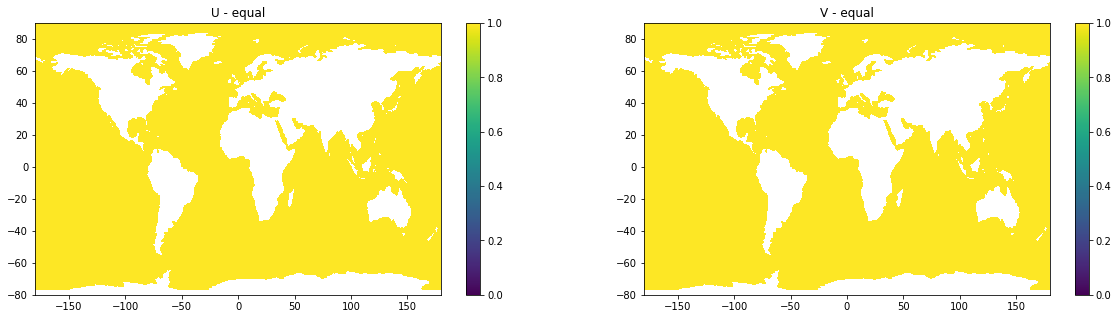

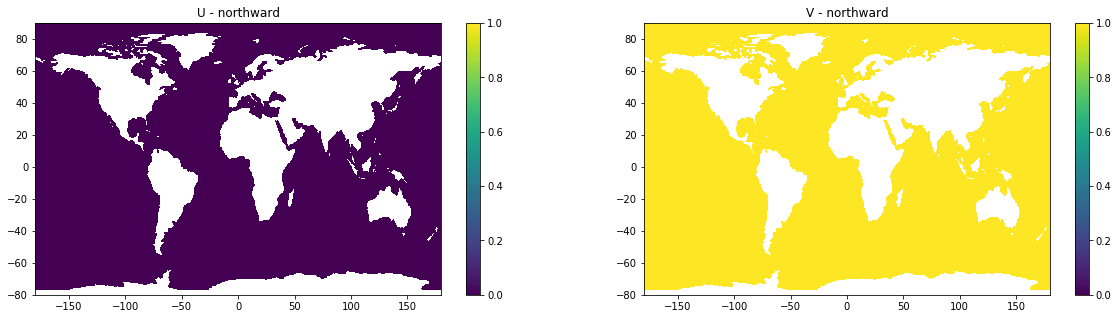

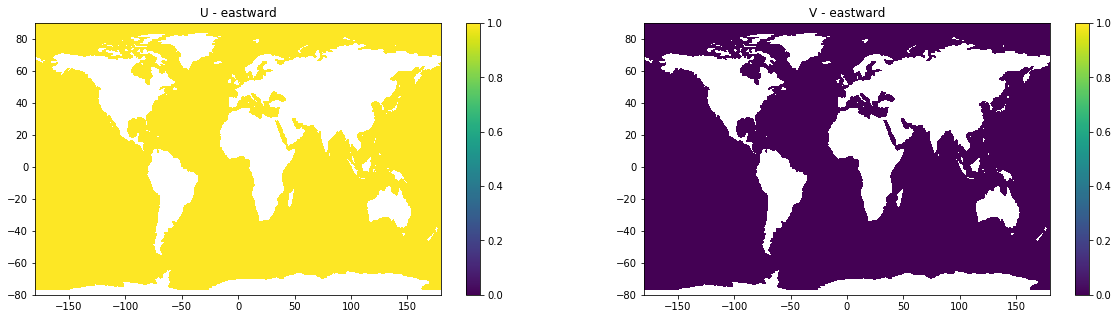

In [4]:
for test in tests:
    fig,axs=plt.subplots(1,2,figsize=(20,5))
    ax=axs[0]
    lon,lat,U,V = data[test]['lon'],data[test]['lat'],data[test]['U'],data[test]['V'] 
    mesh=ax.pcolormesh(lon, lat, U,vmin=0,vmax=1)
    plt.colorbar(mesh,ax=ax)
    ax.set_title('U - {}'.format(test))
    ax=axs[1]
    mesh=ax.pcolormesh(lon, lat, V,vmin=0,vmax=1)
    ax.set_title('V - {}'.format(test))
    plt.colorbar(mesh,ax=ax)

In [16]:
def compare_methods_cyl(U,V,lons,lats,st=75,scale=25):
    fig,axs = plt.subplots(1,2,figsize=(20,10))
    lonmesh,latmesh = np.meshgrid(lons, lats)
    
    for ax, method in zip(axs, ['rotate', 'latlon']):
        bmap = Basemap(projection='sinu',lat_0=0, lon_0=0,ax=ax)
        bmap.drawcoastlines()
        bmap.fillcontinents(color='coral',lake_color='aqua')
        bmap.drawparallels(np.arange(-90.,120.,30.))
        bmap.drawmeridians(np.arange(0.,360.,60.))
        if method == 'rotate':
            unew, vnew, x, y = bmap.rotate_vector(U, V, lonmesh, latmesh, returnxy=True)
            bmap.quiver(x[::st,::st],y[::st,::st],unew[::st,::st],vnew[::st,::st],
                        scale=scale,ax=ax)
            ax.set_title('Quiver plot with rotate vector')
        else:
            bmap.quiver(lonmesh[::st,::st],latmesh[::st,::st],U[::st,::st],V[::st,::st],
                        latlon=True,scale=scale,ax=ax)
            ax.set_title('Quiver plot with latlon=True')
        bmap.plot(x[::st,::st],y[::st,::st],'ko')
    return fig

equal


/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/nsoontiens/anaconda3/lib/python3.6/site-pack

northward
eastward


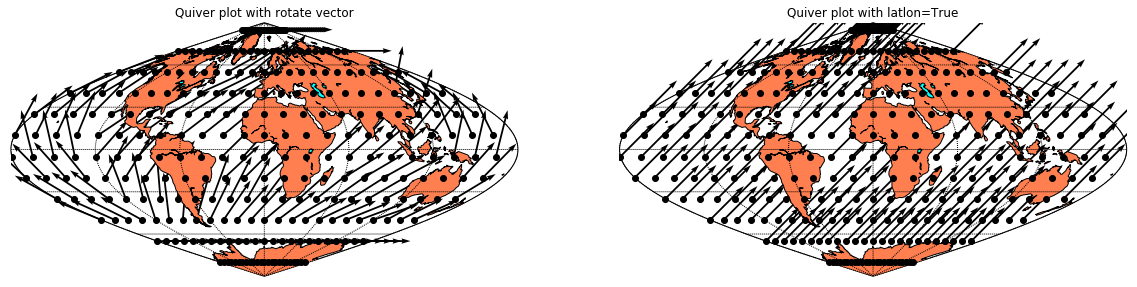

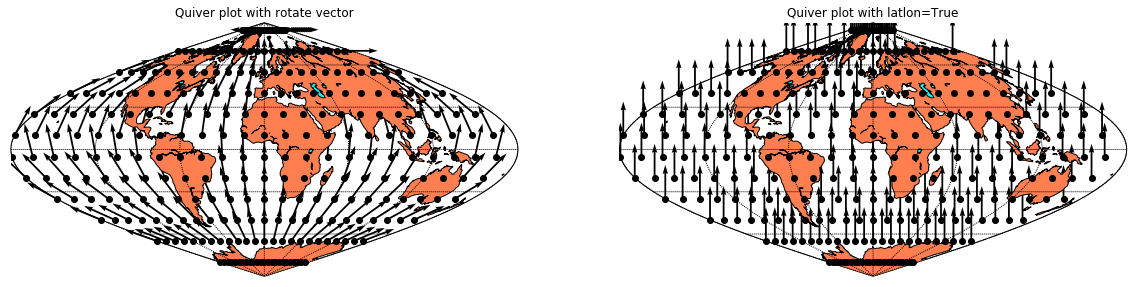

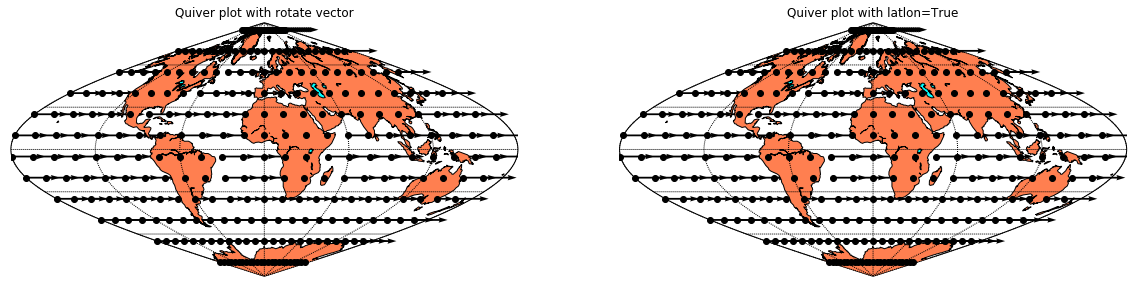

In [17]:
for test in tests:
    print(test)
    lon,lat,U,V = data[test]['lon'],data[test]['lat'],data[test]['U'],data[test]['V'] 
    fig = compare_methods_cyl(U,V,lon,lat,st=75,scale=15)

Neither are right!!

In [9]:
def compare_methods_polar(U,V,lons,lats,st=75,scale=25):
    fig,axs = plt.subplots(1,2,figsize=(20,10))
    lonmesh,latmesh = np.meshgrid(lons, lats)
    
    for ax, method in zip(axs, ['rotate', 'latlon']):
        bmap = Basemap(projection='npstere',boundinglat=60,lon_0=0,ax=ax)
        bmap.drawcoastlines()
        bmap.fillcontinents(color='coral',lake_color='aqua')
        bmap.drawparallels(np.arange(-90.,120.,30.))
        bmap.drawmeridians(np.arange(-180.,180.,60.))
        if method == 'rotate':
            unew, vnew, x, y = bmap.rotate_vector(U,V, lonmesh, latmesh, returnxy=True)
            bmap.quiver(x[::st,::st],y[::st,::st],unew[::st,::st],vnew[::st,::st],
                        scale=scale,ax=ax)
            ax.set_title('Quiver plot with rotate vector')
        else:
            bmap.quiver(lonmesh[::st,::st],latmesh[::st,::st],U[::st,::st],V[::st,::st],
                        latlon=True,scale=scale,ax=ax)
            ax.set_title('Quiver plot with latlon=True')
        bmap.plot(x[::st,::st],y[::st,::st],'ko')
    return fig

equal


/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/nsoontiens/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDe

northward
eastward


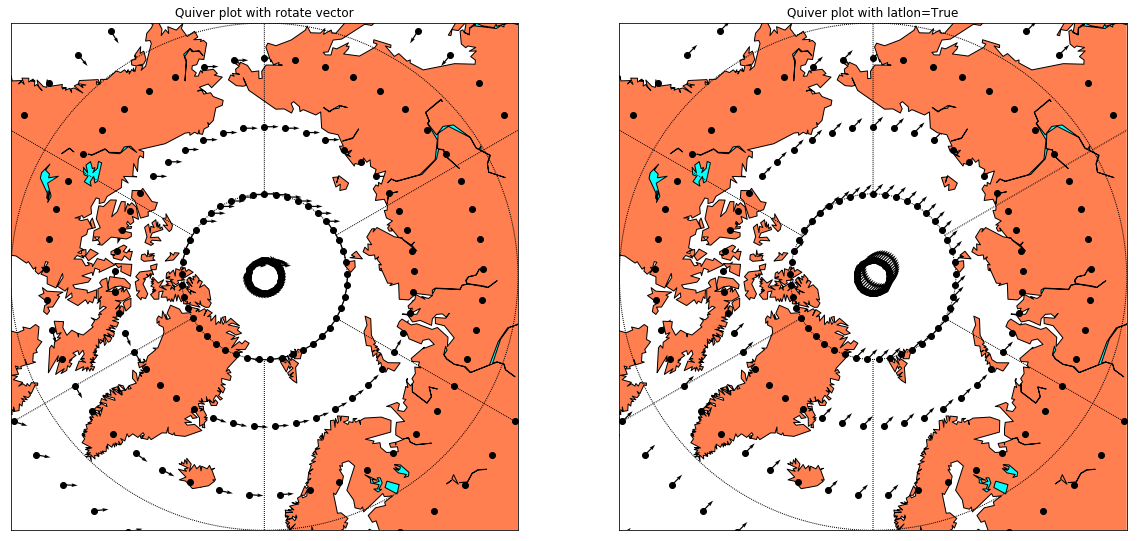

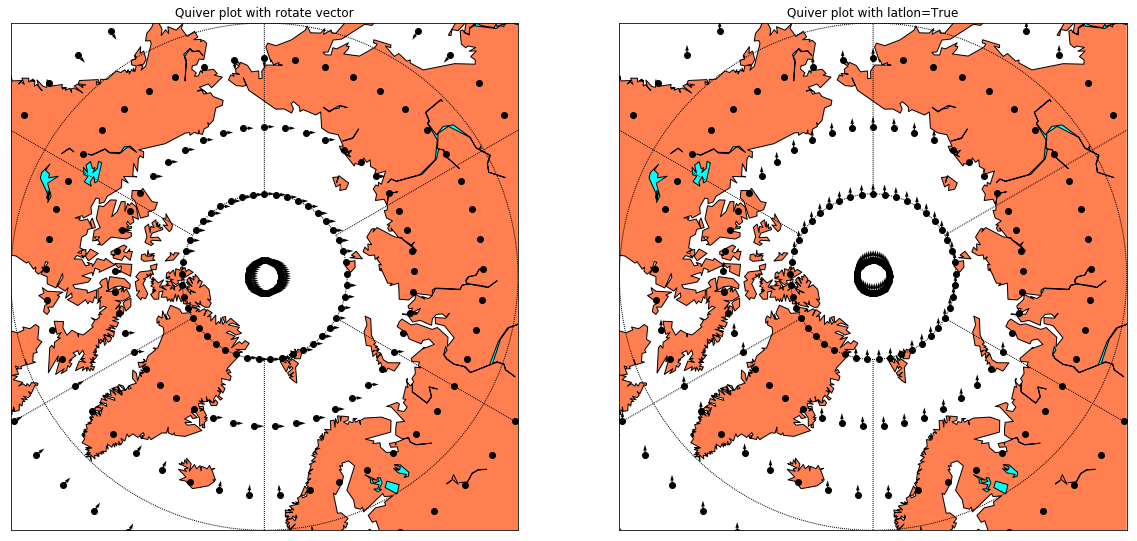

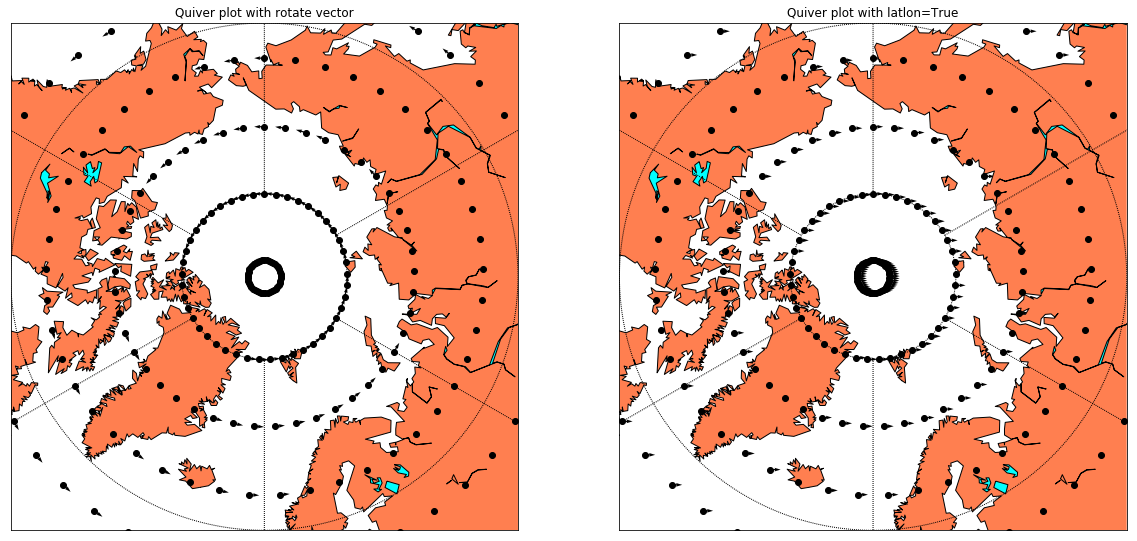

In [10]:
for test in tests:
    print(test)
    lon,lat,U,V = data[test]['lon'],data[test]['lat'],data[test]['U'],data[test]['V'] 
    fig = compare_methods_polar(U,V,lon,lat,st=40,scale=50)

In [20]:
print(data['equal']['lat'])

[-80.         -79.80000305 -79.59999847 -79.40000153 -79.19999695 -79.
 -78.80000305 -78.59999847 -78.40000153 -78.19999695 -78.         -77.80000305
 -77.59999847 -77.40000153 -77.19999695 -77.         -76.80000305
 -76.59999847 -76.40000153 -76.19999695 -76.         -75.80000305
 -75.59999847 -75.40000153 -75.19999695 -75.         -74.80000305
 -74.59999847 -74.40000153 -74.19999695 -74.         -73.80000305
 -73.59999847 -73.40000153 -73.19999695 -73.         -72.80000305
 -72.59999847 -72.40000153 -72.19999695 -72.         -71.80000305
 -71.59999847 -71.40000153 -71.19999695 -71.         -70.80000305
 -70.59999847 -70.40000153 -70.19999695 -70.         -69.80000305
 -69.59999847 -69.40000153 -69.19999695 -69.         -68.80000305
 -68.59999847 -68.40000153 -68.19999695 -68.         -67.80000305
 -67.59999847 -67.40000153 -67.19999695 -67.         -66.80000305
 -66.59999847 -66.40000153 -66.19999695 -66.         -65.80000305
 -65.59999847 -65.40000153 -65.19999695 -65.         -64.8